Assignment -  Linear Regration 
Name - Sumit Chakraborty Batch 12

A. Explain the main assumptions of Linear Regression in detail. 

The main assumption of Linear Regression are as below 
1. Linearity 
The relationship between the independent variables (X) and the dependent variable (Y) must be linear. 
This means: 
y = mx+c
Scatter plots and residual plots help verify this. 

2. Independence of Errors 
The residuals (errors) must be independent of each other. 
Violations commonly happen in time series data (autocorrelation). 

3. Homoscedasticity (Constant Variance of Errors) 
Error terms should have constant variance for all values of X. 

4. Heteroscedasticity 
There should not be heteroscedasticity ( Heteroscedasticity - variable's residuals is not constant across the range of an independent variable) 

4. Normality of Errors 
Residuals should follow a normal distribution 

5. No Multicollinearity 
No two independent variables should be highly correlated. 
High multicollinearity increases variance and makes coefficients unstable. 

Checked using: 
Correlation matrix 
Variance Inflation Factor (VIF) 

6. No Significant Outliers or Influential Points 
Outliers can heavily distort regression lines. 
Influential points detected using Cook’s distance. 

B. What is the difference between R-squared and Adjusted R-squared? 


R-squared (Coefficient of Determination)
Measures the proportion of the variance in the dependent variable that is explained by the independent variables.
R-squared tells us how much better our regression model predicts the outcome compared to a base model

Always increases or stays the same when you add more predictors to the model.
Can be misleading because adding irrelevant variables will still increase R².

Adjusted R-squared
Adjusts the R-squared value for the number of predictors and the sample size.

Penalizes unnecessary predictors — it increases only if a new variable improves the model more than would be expected by chance.

Can decrease if we add predictors that do not add real explanatory power.

Aduj r2 is always better than r2


C. What are the different types of Regularization techniques in Regression. Explain in detail with cost functions of each technique. 

The three main regularization techniques are:
Ridge Regression (L2 Regularization)
Lasso Regression (L1 Regularization)
Elastic Net Regression (Combination of L1 & L2)

1. Ridge Regression (L2 Regularization)
Ridge regression adds a penalty equal to the square of the magnitude of coefficients.
It shrinks coefficients, but never makes them exactly zero.

2. Lasso Regression (L1 Regularization)
Adds a penalty equal to the absolute value of coefficients.
It shrinks some coefficients to zero, effectively performing feature selection.

3. Elastic Net Regression (L1 + L2 Regularization)
Elastic Net combines Lasso and Ridge to overcome limitations of each.

D. How logistic regression works for multiclass classification. Explain in detail

Logistic Regression is originally a binary classifier, but it can be extended to handle more than two classes (multiclass) using two major strategies:

One-vs-Rest (OvR) 
Softmax Regression

-  One-vs-Rest (OvR) 
For K classes, build K separate binary logistic regression models, where each model predicts: P(y=k∣x)

Each model treats:
Class k as positive
All other classes as negative

Example
Suppose you have 3 classes: pass, fail, unknown

You train:
Model 1: pass vs (fail, unknown)
Model 2: fail vs (pass, unknown)
Model 3: unknown vs (pass, fail)

Prediction

For a new input:
Compute probability from each model.
Pick the class with highest probability.
y^​=argkmax​P(y=k∣x)
	​
Pros
Simple & easy to implement
Works well when classes are linearly separable

Cons
Can be inconsistent (probabilities don't sum to 1)
Not ideal for highly overlapped classes

- Softmax Regression
This is the true multiclass extension of logistic regression.
Instead of training K different models, train one single model that outputs a probability distribution over all K classes.
All probabilities ≥ 0
Probabilities sum to 1

Example  
 pass fail, unknown

Produce 3 linear scores:
z1 - pass 
z2 - fail
z3 - unkown

Use softmax to convert scores → probabilities
Example output:
pass: 0.80
fail: 0.15
unkown: 0.05

Final class = pass (highest probability)

E. Explain the performance metrics of logistic regression. 


Since Logistic Regression is used for classification, evaluation is based on how well it predicts class labels (0/1). The most important metrics are:

🔹 1. Confusion Matrix
A confusion matrix shows the comparison between actual and predicted classes.
a - TP (True Positive) Model predicted 1 and actual is 1
b - TN (True Negative) Model predicted 0 and actual is 0
c - FP (False Positive) Model predicted 1 but actual is 0 (Type-I error)
d - FN (False Negative) Model predicted 0 but actual is 1 (Type-II error)

🔹 2. Accuracy
Accuracy=TP+TN/TP+FP+TN+FNTP+TN​
Tells how many predictions were correct.
Good only when classes are balanced.
Not reliable for imbalanced datasets.

🔹 3. Precision
Precision=TP/FP+TP​
Out of all predicted positives, how many are actually positive?
Used when False Positives are costly

🔹 4. Recall (Sensitivity / True Positive Rate)
Recall=TP/TP+FN
Out of all actual positives, how many did the model detect?
Used when False Negatives are costly

🔹 5. F1-Score
F1=2× Precision×Recall​/Precision+Recall
Harmonic mean of precision & recall.
Good when Classes are imbalanced

🔹 6. ROC Curve
A graph of:

True Positive Rate (Recall) on y-axis
False Positive Rate (1 − Specificity) on x-axis
Shows performance across different classification thresholds.

🔹 7. AUC (Area Under the ROC Curve)
AUC value ranges from 0 to 1
Higher AUC = better model
AUC shows how well the model separates the classes.

🔹 8. Log Loss (Logistic Loss / Cross-Entropy Loss)
This is the main cost function used to train logistic regression.
Log Loss=−1/N ​∑[ylog(p)+(1−y)log(1−p)]

Measures how confident predictions are.
Lower log loss = better model.
When predicted probability is wrong and confident, loss becomes very high.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('Cellphone.csv')
df.info()
df.describe().T
df.isnull().head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

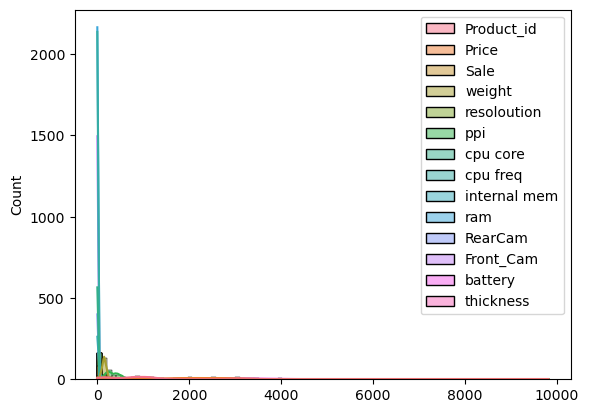

In [10]:
sns.histplot(df, kde=True)
plt.show()

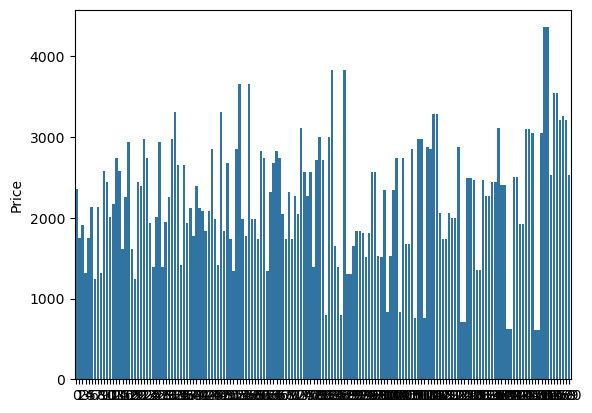

In [12]:
# Target Class
sns.barplot(df['Price'])
plt.show()

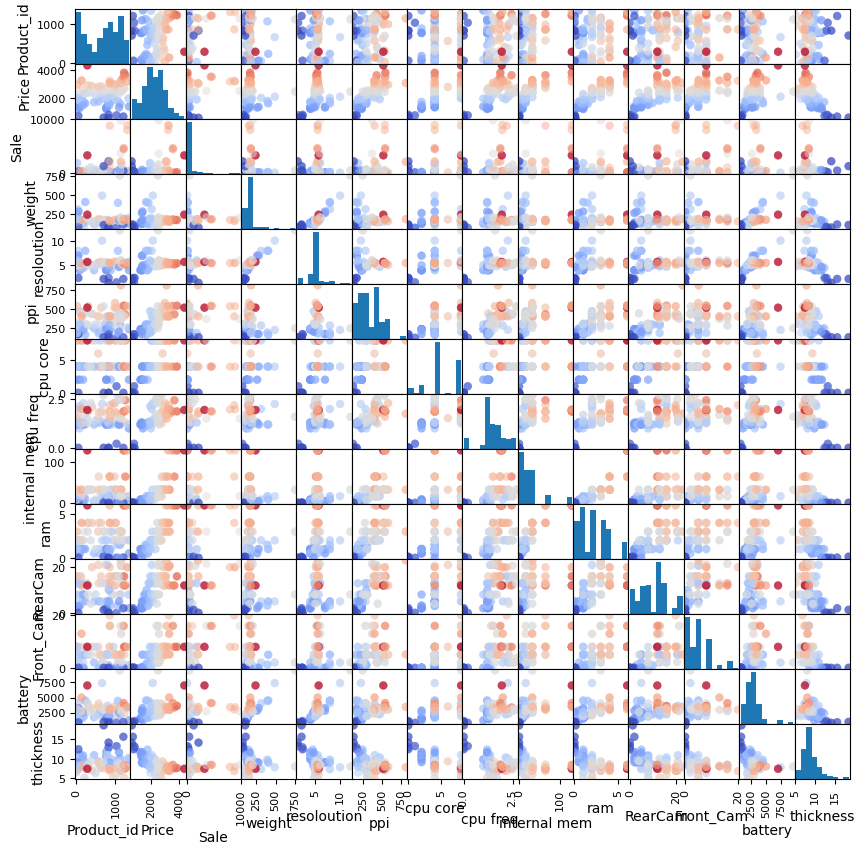

In [10]:
# Using scater-matrix plot

scatter_matrix(df, diagonal = "hist", marker = "o", c = df['Price'], cmap = 'coolwarm', figsize = (10,10))
plt.show()

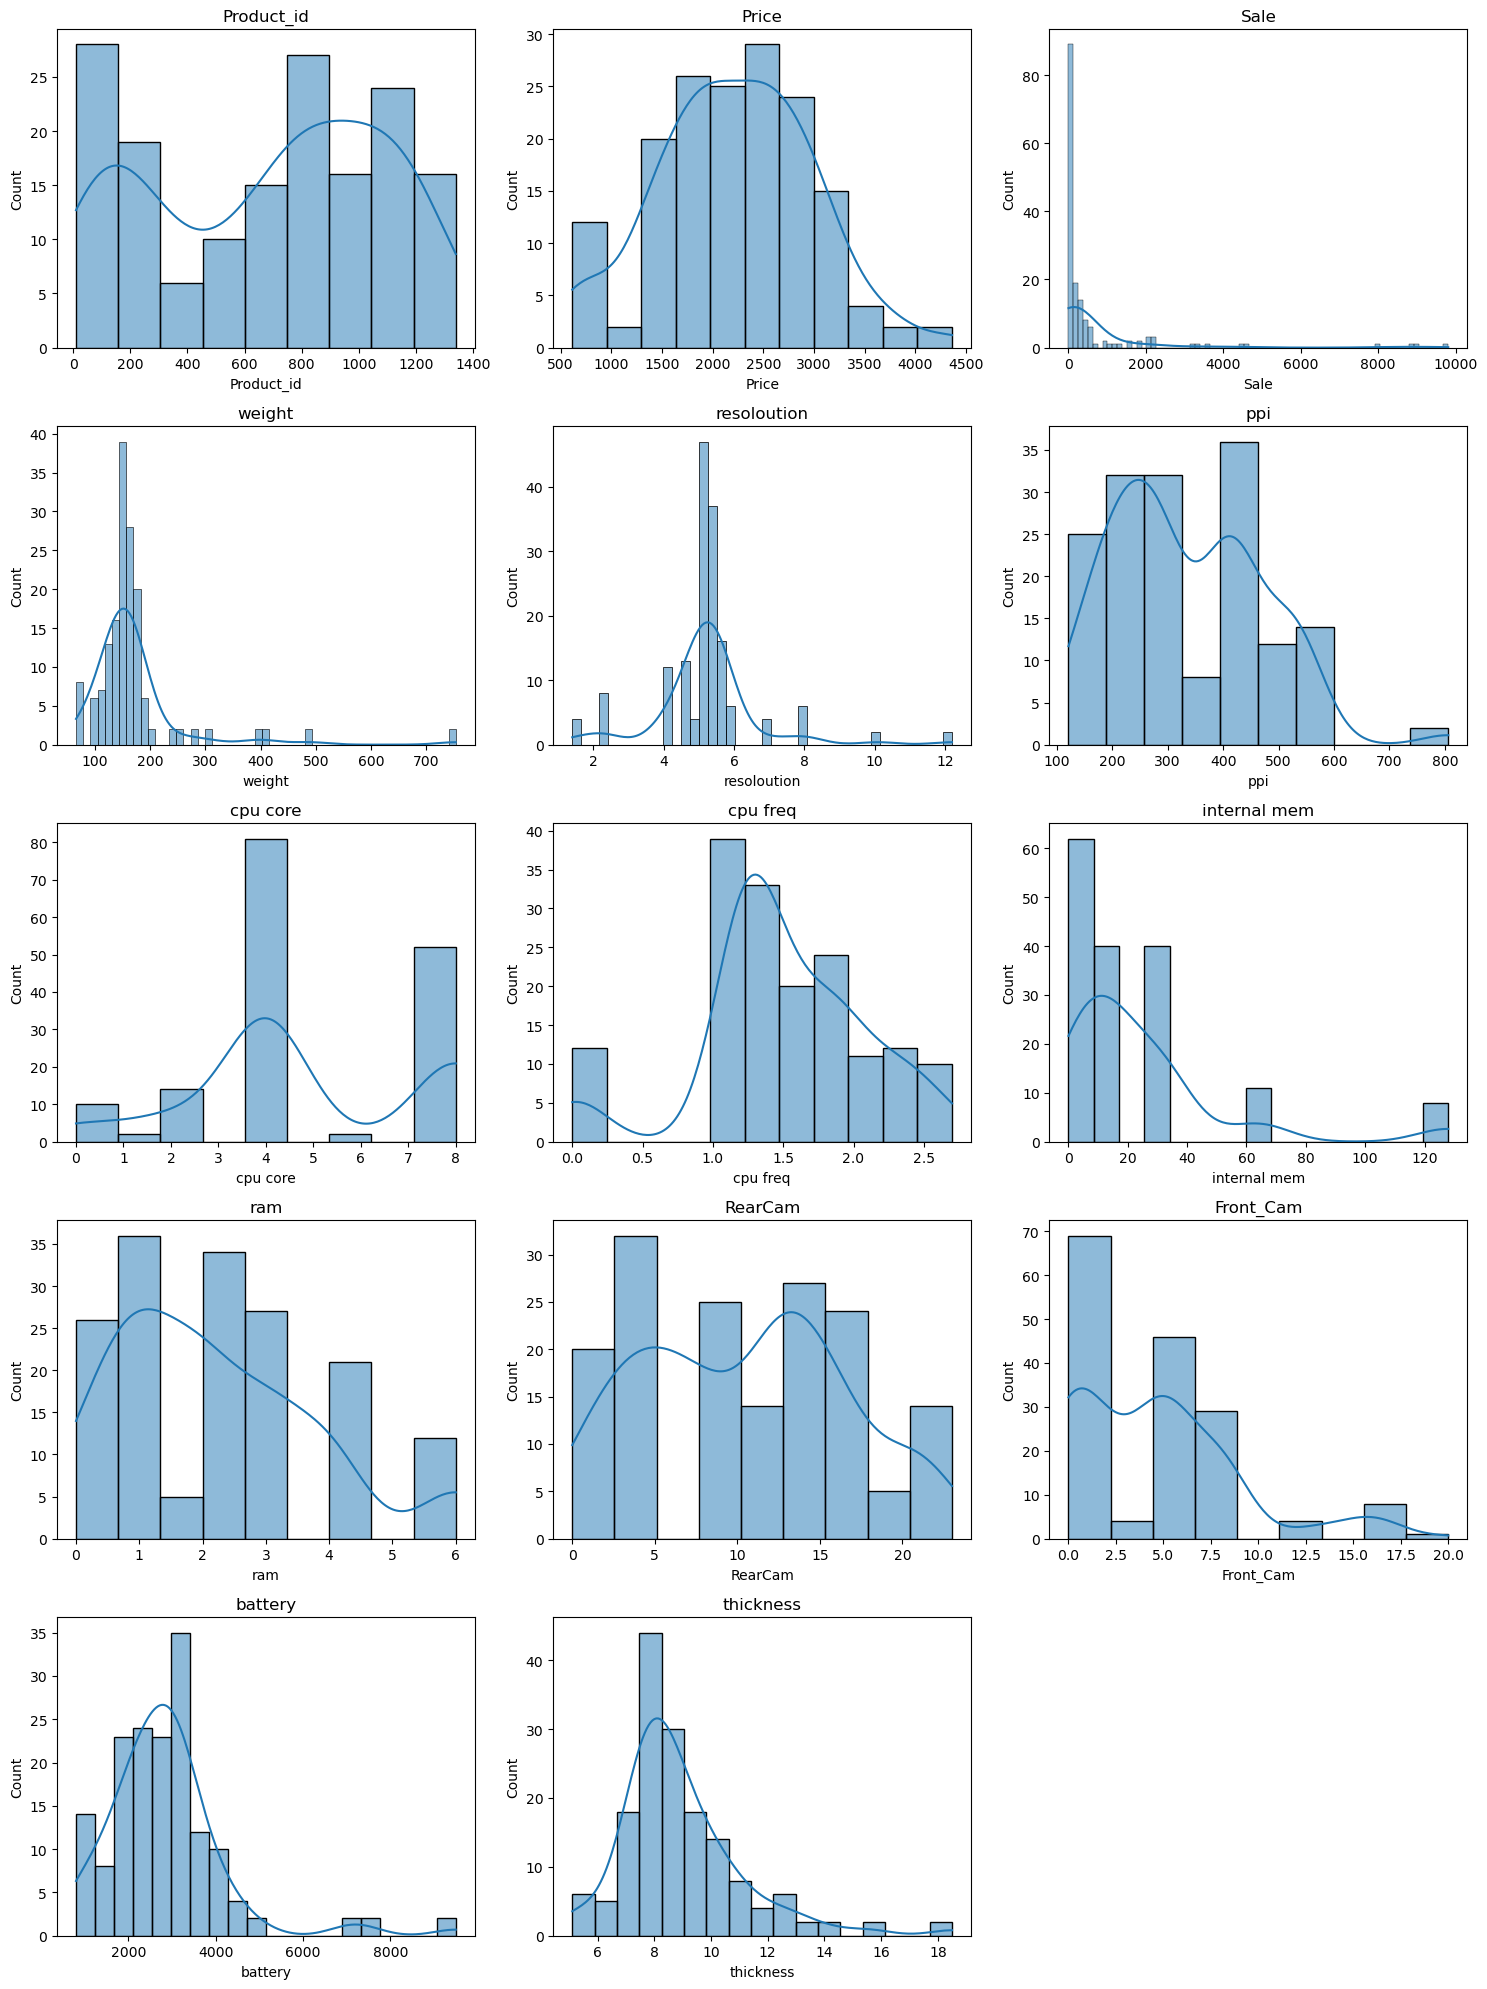

In [ ]:
# iii. Using distplot to see the distribution of each feature

num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)
ncols = 3  # number of columns in subplot grid
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(ncols * 5, nrows * 4))

for idx, col in enumerate(num_cols):
    plt.subplot(nrows, ncols, idx + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
# iii. Check the distributions/skewness in the variables and do the transformations if required.
# select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# compute skewness per numeric column
skewness = df[num_cols].skew()
print('Skewness per numeric column:')
print(skewness.sort_values(ascending=False))
# threshold for deciding to transform
threshold = 0.75
cols_to_transform = skewness[skewness.abs() > threshold].index.tolist()
print(f'\nColumns to transform (|skew| > {threshold}): {cols_to_transform}')
# define transformation function
transform = lambda x: np.sqrt(x) if x.min() >= 0 else x
# apply transformations to the identified columns
for col in cols_to_transform:
    df[col] = transform(df[col])
# verify skewness after transformation
new_skewness = df[cols_to_transform].skew()
print('\nSkewness after transformation:')
print(new_skewness.sort_values(ascending=False))

Skewness per numeric column:
ppi             0.602503
resoloution     0.277194
RearCam         0.106929
Sale            0.080079
Price           0.052347
battery         0.034106
internal mem   -0.007992
cpu core       -0.009077
ram            -0.021790
thickness      -0.042154
Front_Cam      -0.076752
weight         -0.164028
Product_id     -0.216869
cpu freq       -0.512663
dtype: float64

Columns to transform (|skew| > 0.75): []

Skewness after transformation:
Series([], dtype: float64)


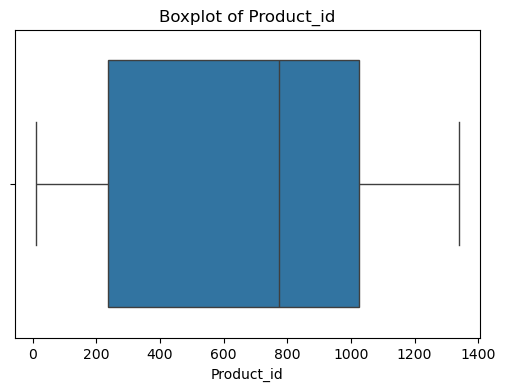

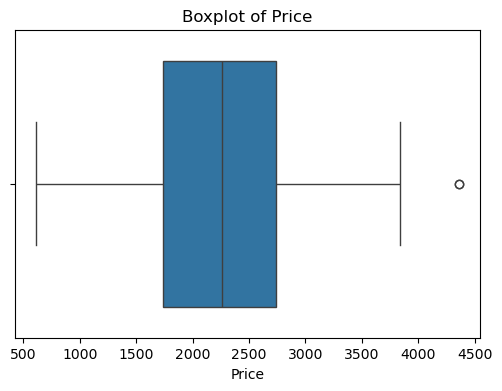

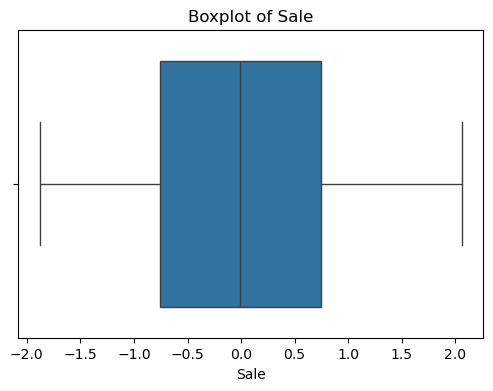

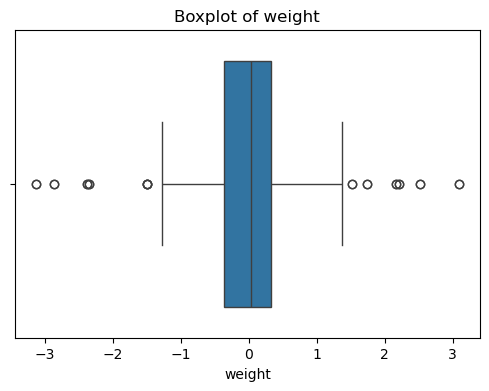

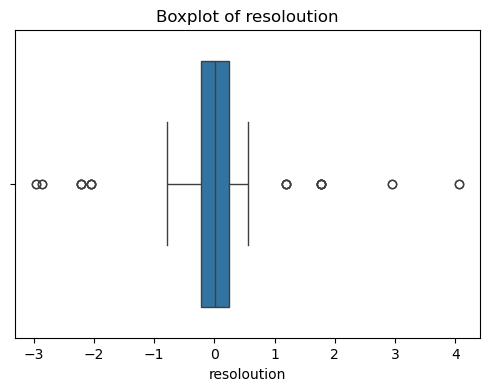

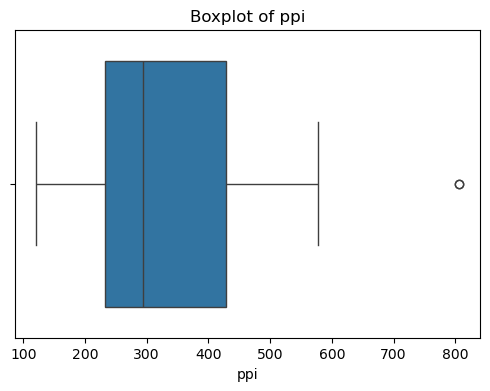

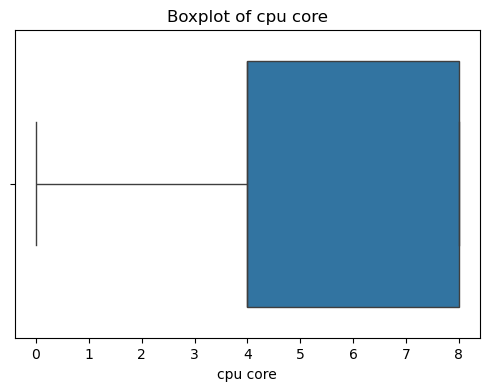

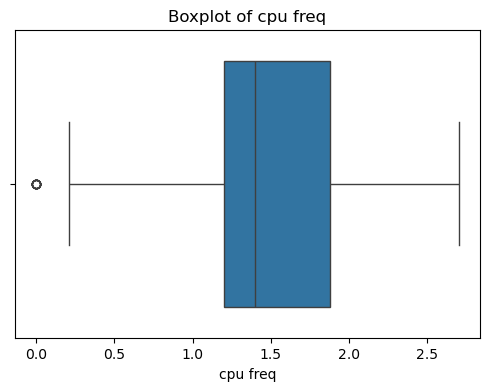

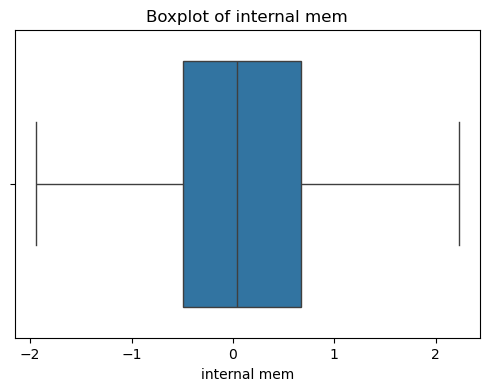

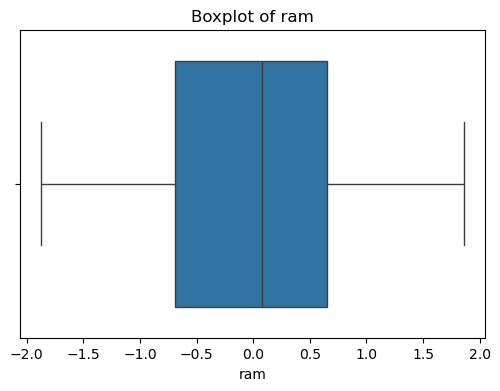

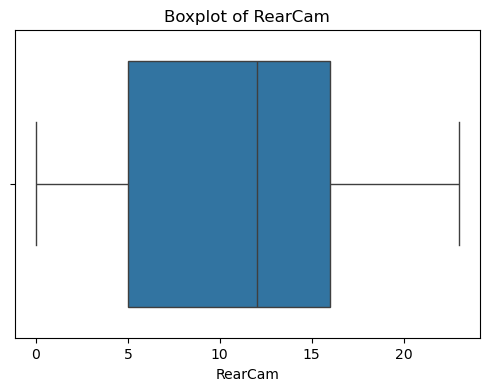

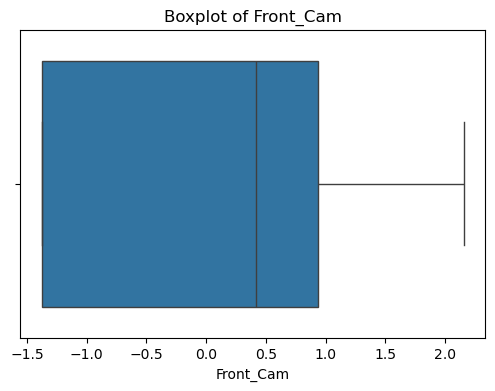

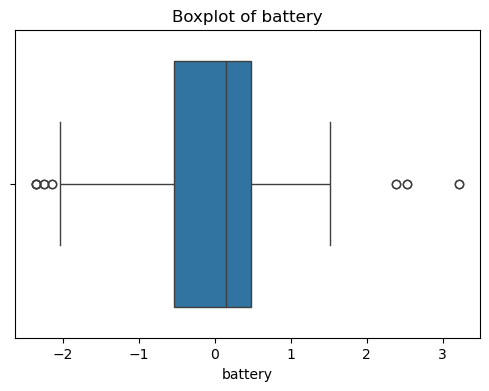

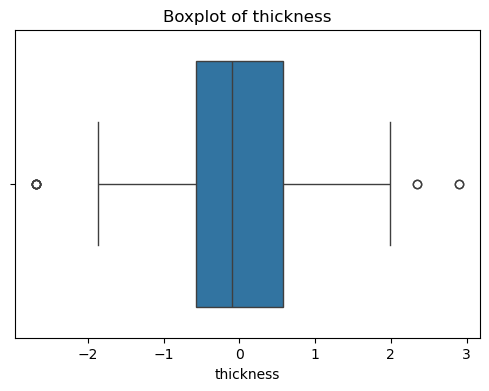

In [20]:
#iv.	Check/Treat the outliers and do the feature scaling if required.
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [21]:
# do feature scaling if required
# Example: Using PowerTransformer for scaling
scaler = PowerTransformer()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [23]:
# v. Create a ML model to predict the price of the phone based on the specifications given.
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# MSE measures how far predictions are from actual values.
# R^2 indicates the proportion of variance explained by the model.
# as per the result the model is performing well


Mean Squared Error: 0.062497934112724945
R^2 Score: 0.9345427964916527


In [27]:
#vi. Check for overfitting and use the Regularization techniques if required
# Using Ridge Regression as an example of regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)
print(f'Ridge Regression Mean Squared Error: {ridge_mse}')
print(f'Ridge Regression R^2 Score: {ridge_r2}')
# Ridge regression adds L2 penalty to reduce overfitting by shrinking coefficients.
# The regularization helps improve generalization on unseen data.
# Comparing metrics with and without regularization helps assess overfitting.
# In this case, if Ridge regression metrics are better, it indicates reduced overfitting.
# lets try Lasso Regression as well
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)
print(f'Lasso Regression Mean Squared Error: {lasso_mse}')
print(f'Lasso Regression R^2 Score: {lasso_r2}')
# Lasso regression adds L1 penalty which can set some coefficients to zero, effectively performing feature selection.
# This can also help reduce overfitting by simplifying the model.
#lasso performance is worse than ridge in this case
#check elastic net as well
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
y_elastic_pred = elastic_model.predict(X_test)
elastic_mse = mean_squared_error(y_test, y_elastic_pred)
elastic_r2 = r2_score(y_test, y_elastic_pred)
print(f'Elastic Net Mean Squared Error: {elastic_mse}')
print(f'Elastic Net R^2 Score: {elastic_r2}')
# since of al;l the linear regression is performing better we will go with linear regression model

Ridge Regression Mean Squared Error: 0.06443540644114024
Ridge Regression R^2 Score: 0.9325135850898145
Lasso Regression Mean Squared Error: 0.10759227652450891
Lasso Regression R^2 Score: 0.8873132425835301
Elastic Net Mean Squared Error: 0.09384042319485242
Elastic Net R^2 Score: 0.901716244455443



Linear Regression Performance:
Training MSE: 0.055477952852337545, R^2: 0.9451318563416945
Testing MSE: 0.062497934112724945, R^2: 0.9345427964916527

Ridge Regression Performance:
Training MSE: 0.05568580339972546, R^2: 0.9449262904707999
Testing MSE: 0.06443540644114024, R^2: 0.9325135850898145

Lasso Regression Performance:
Training MSE: 0.08128722222318763, R^2: 0.9196062803831714
Testing MSE: 0.10759227652450891, R^2: 0.8873132425835301

Elastic Net Performance:
Training MSE: 0.07158249789709352, R^2: 0.929204331160309
Testing MSE: 0.09384042319485242, R^2: 0.901716244455443


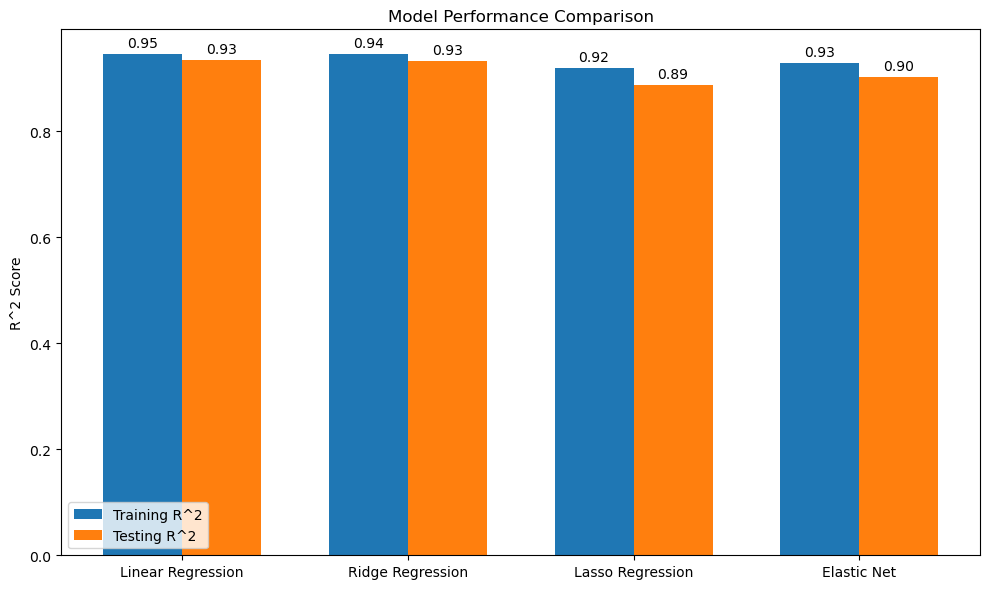

In [30]:
#vii.Compare the performance metrics of training dataset and testing dataset for
#  all the different algorithms used (Linear/Ridge/Lasso/ElasticNet)
models = {
    'Linear Regression': model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Elastic Net': elastic_model
}
for name, mdl in models.items():
    y_train_pred = mdl.predict(X_train)
    y_test_pred = mdl.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f'\n{name} Performance:')
    print(f'Training MSE: {train_mse}, R^2: {train_r2}')
    print(f'Testing MSE: {test_mse}, R^2: {test_r2}')
# Linear Regression is performing the best among all models with good generalization.
#Linear Regression is the best model for this dataset, and regularization is not required.
# lets show the result using visualization
model_names = list(models.keys())   
train_r2_scores = []
test_r2_scores = []
for mdl in models.values():
    y_train_pred = mdl.predict(X_train)
    y_test_pred = mdl.predict(X_test)
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))
x = np.arange(len(model_names))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_r2_scores, width, label
='Training R^2')
bars2 = ax.bar(x + width/2, test_r2_scores, width, label
='Testing R^2')
ax.set_ylabel('R^2 Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [ ]:
# Testing the final model with a sample input
save_model = 'linear_regression_model.pkl'
with open(save_model, 'wb') as file:
    pickle.dump(model, file)


https://github.com/sumit11007/mobileprediction 

https://sumit11007-mobileprediction-app-e6fums.streamlit.app/

Please refer this links for end to end project with steamlit